In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [3]:
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


#데이터 가져오기

In [4]:
%cd /content/drive/MyDrive/nationalhealth-main

/content/drive/MyDrive/nationalhealth-main


In [5]:
region_old_g = pd.read_csv('/content/drive/MyDrive/elderly people classification/지역별 독거노인들.csv')
new_alone = pd.read_csv('/content/drive/MyDrive/elderly people classification/독거노인총질병수.csv', encoding='cp949')


In [6]:
drinks = ['BD1_11', 'BD2_1', 'BD2_31', 'dr_month']
stress = ['D_1_1','BP6_10', 'BP7', 'mh_stress']
smoke =['BS3_1']

In [7]:
disease = ['비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

In [8]:
new_alone = new_alone[new_alone['총질병수']>0] #총 질병이 1개 이상인 경우

###독거노인_ 정신적 스트레스,소득분위, 주관적건강인지, 총질병수

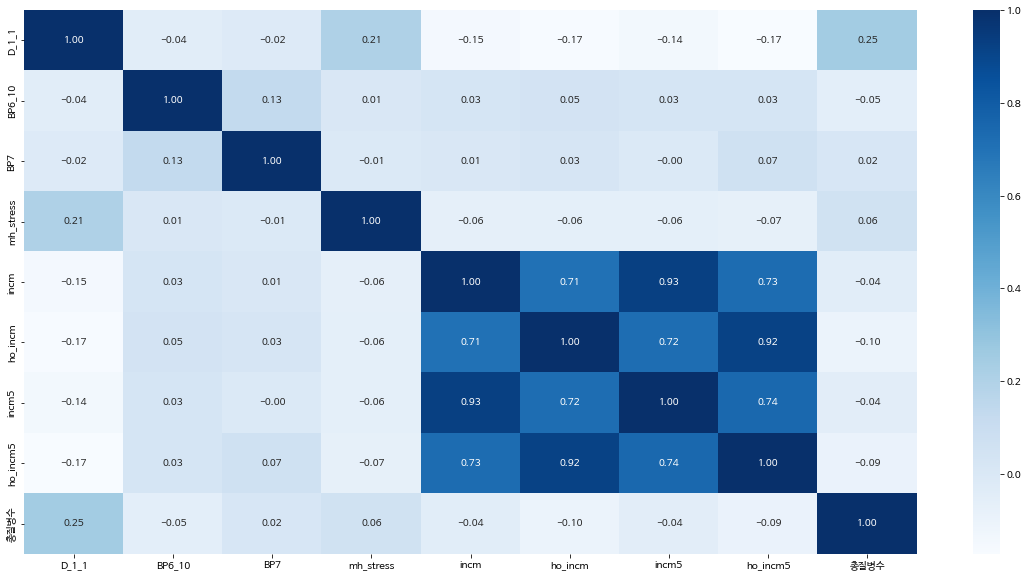

In [22]:
df = pd.concat([new_alone[stress],new_alone[income], new_alone["총질병수"]], axis=1)
df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

###흡연_음주, 질병과의 상관관계

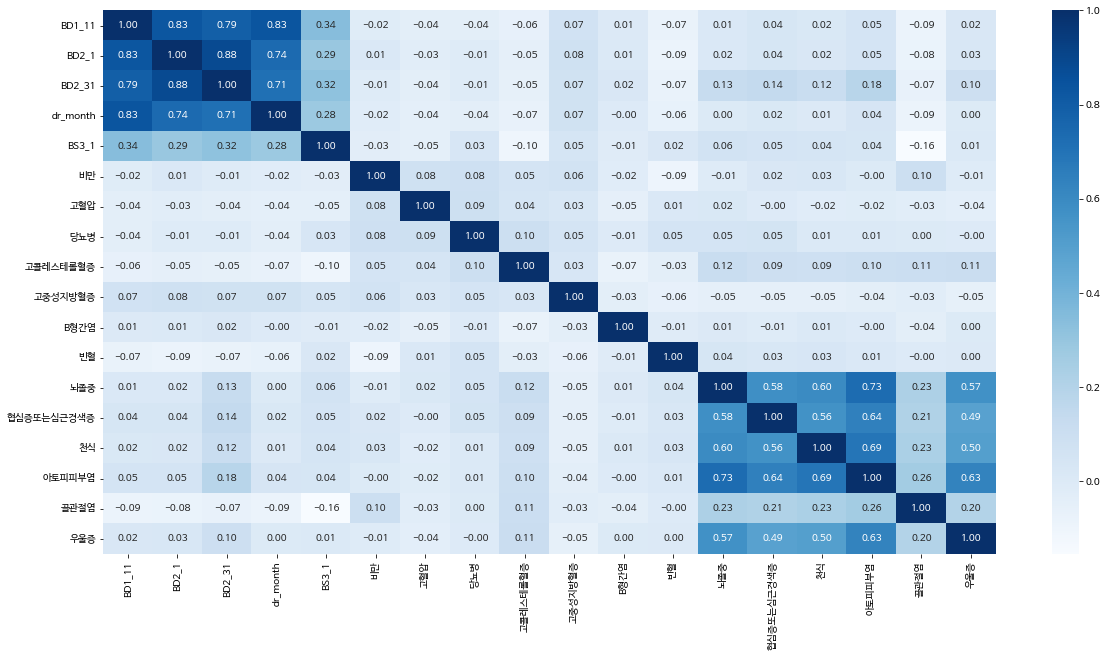

In [9]:
df = pd.concat([new_alone[drinks],new_alone[smoke],new_alone[disease]], axis=1)
df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

###주관적 건강인지와 질병간의 상관관계

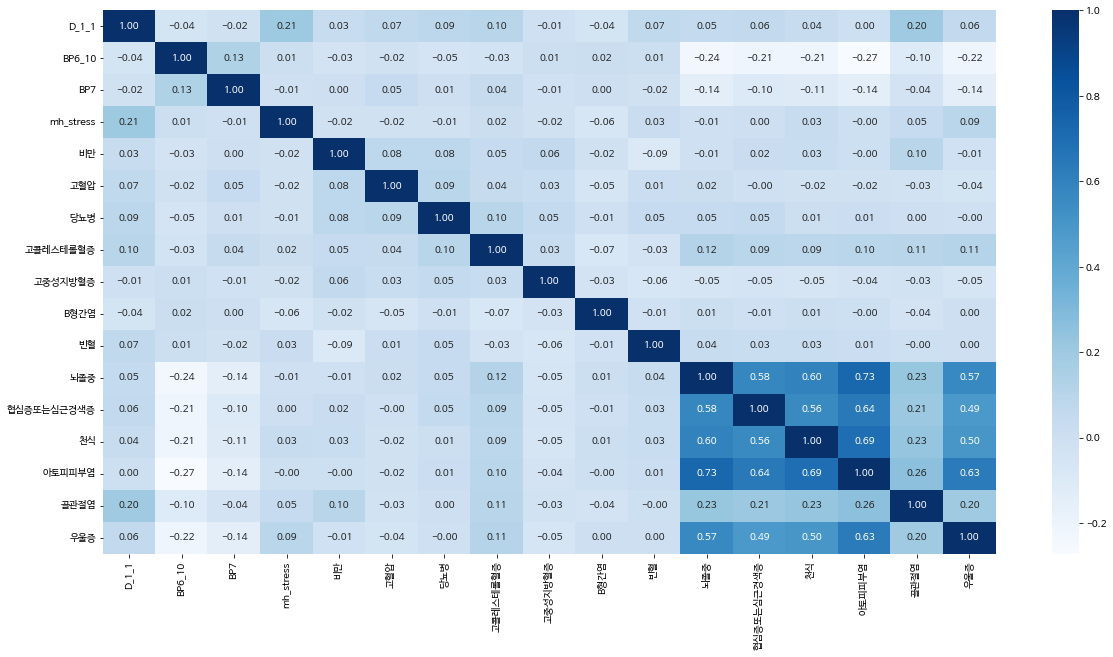

In [10]:
df = pd.concat([new_alone[stress],new_alone[disease]], axis=1)
df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

###교육수준과 질병간의 관계

In [15]:
edu = ['EC_pedu_1','EC_pedu_2','educ']
exercise = ['BE3_31','BE5_1']

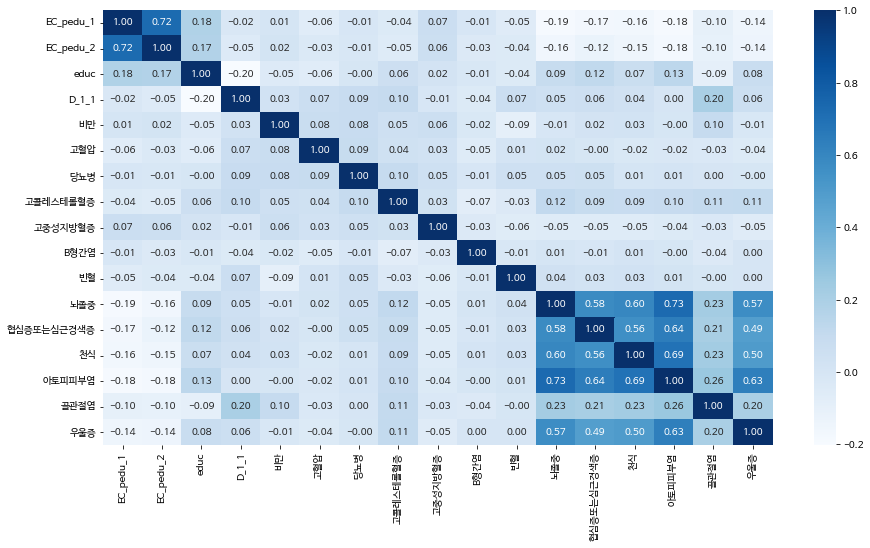

In [19]:
df = pd.concat([new_alone[edu],new_alone['D_1_1'],new_alone[disease]], axis=1)
df = df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

###운동여부와 질병간의 관계

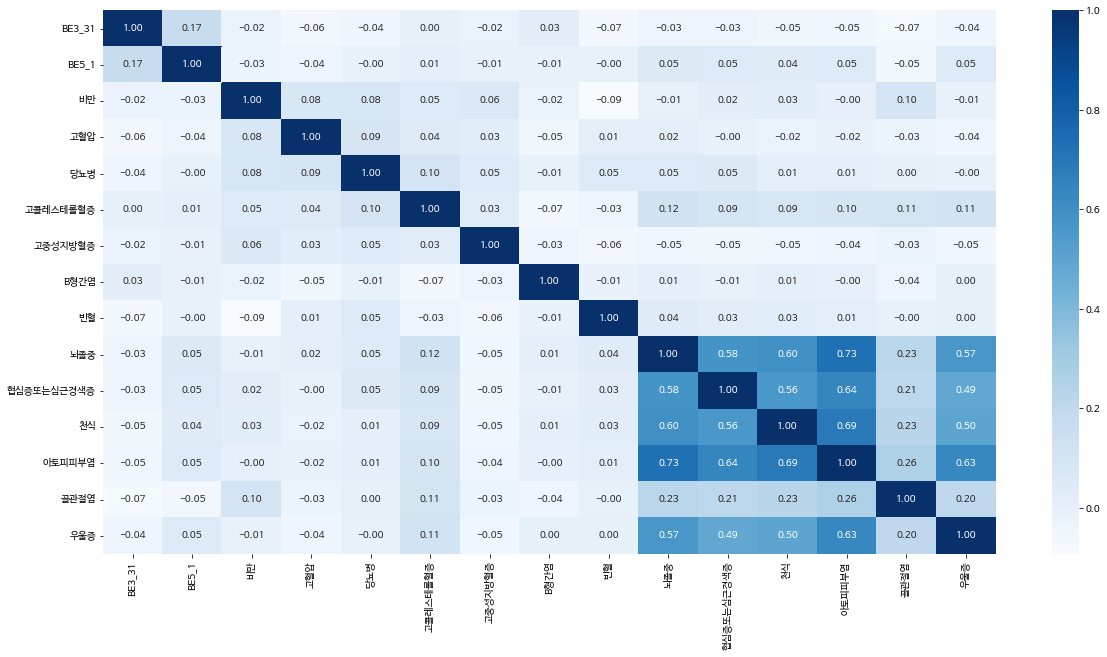

In [17]:
df = pd.concat([new_alone[exercise],new_alone[disease]], axis=1)
df = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')

###영양소와 질병들의 상관관계

In [20]:
nutrition = ['N_INTK',
'N_EN',
 'N_WATER',
 'N_PROT',
 'N_FAT',
 'N_CHO',
 'N_CA',
 'N_PHOS',
 'N_FE',
 'N_NA',
 'N_K',
 'N_CAROT',
 'N_RETIN',
 'N_B1',
 'N_B2',
 'N_NIAC',
 'N_VITC']

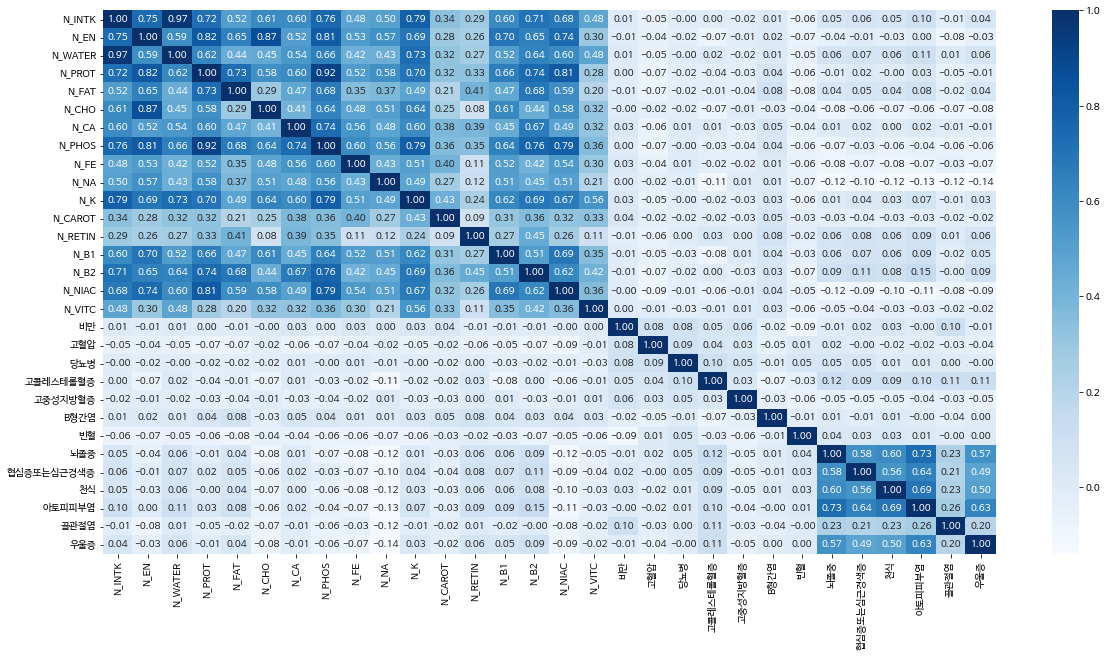

In [21]:
df = pd.concat([new_alone[nutrition],new_alone[disease]], axis=1)
df = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues')